# Project Objective

**Context**

Customers are leaving our bank (Beta Bank). We want to find a way to reduce or stop that from happening.

**Objective**

The project's objective is to build a model that can predict which customers are going to leave.

**Project Structure**

1. Prepare the Data - pre-processing, OHE or ordinal encoding of categoricals, scaling of numericals.
2. Examine class imbalance - build a model that considers imbalance and one that doesn't.
3. Test different hyperparameters to obtain best quality model. F1 score must be above 0.59, and also have an AUC-ROC quality check.
4. Final test and remarks.

**Data**

*Characteristics*

RowNumber — index of data strings

CustomerId — unique customer identifier

Surname — last name

CreditScore — credit score

Geography — country of residence

Gender — gender

Age — age

Tenure — customer's service time

Balance — account balance

NumOfProducts — number of banking products used by the customer

HasCrCard — whether the customer has a credit card (1 - yes; 0 - no)

IsActiveMember — whether the customer is active (1 - yes; 0 - no)

EstimatedSalary — estimated salary

*Target*

Exited — whether the customer exited (1 - yes; 0 - no)

## Prepare the data

Let's do OHE for the categoricals and scaling of the numericals of the dataset.

In [1]:
#importing initial libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing dataset and initial information
df = pd.read_csv('/datasets/Churn.csv')
print(df.shape)
print(df.info())
print()
print('Describe')
display(df.describe())
display(df.head())

(10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None

Describe


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


**Analysis**

We see a few things that can be done here:
1. We can drop the RowNumber column,
2. The `Tenure` column has some missing values. Mean and median for the column are very similar, so we'll `fillna` those values with the column median,
3. Also need to check for duplicates, just to be sure.

Apart from that, data seems sensible (no negative age, for example). Last thing we can do before moving on to preprocessing is check `value_counts` for the categorical columns `Surname`, `Geography` and `Gender`, and see if there is anything wrong there.

We could also lowercase all column names, but that is not necessary.

In [3]:
#Completing missing values in Tenure column, checking if worked
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df['Tenure'].isna().sum()

#droping the RowNumber column
df = df.drop('RowNumber', axis = 1)
df.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1


In [4]:
#Checking duplicates
df.duplicated().sum()

0

In [5]:
#Checking value counts for categoricals
print(df['Surname'].value_counts())
print()
print(df['Geography'].value_counts())
print()
print(df['Gender'].value_counts())

Smith         32
Martin        29
Scott         29
Walker        28
Brown         26
              ..
Wheare         1
Kincaid        1
Weston         1
MacDonnell     1
Phelps         1
Name: Surname, Length: 2932, dtype: int64

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Male      5457
Female    4543
Name: Gender, dtype: int64


**Analysis**

 - Don't see how the `Surname` column could help our prediction model. We'll drop it too, and then move on with preprocessing.

In [6]:
#droping surname column
df = df.drop('Surname', axis = 1)
df.head(3)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1


We should also drop the `CustomerId`column, since it is just a unique customer ID - it shouldn't have any relationship with the target, and therefore won't contribute to the model's performance.

In [7]:
#droping CustomerId
df = df.drop('CustomerId', axis = 1)

In [8]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.0,1,1,1,101348.88,1


### Pre-Processing: OHE/Ordinal Econding and Scaling

Now, since there aren't many unique values in the Geography and Gender categoricals, we'll one-hot encode them.
Then, we'll scale the numerical values.

Also, since we are likely to use the RandomForest or LogisticRegression model, multicolinearity caused by the OHE won't be much of an issue, and also, data dimensionality should not be an issue either, given the low amount of unique values for these categoricals. If there were significantly more, we would use the `OrdinalEnconder`, but it won't be necessary here.

Here are the next steps we'll take:
 - 1. OHE the data.
 - 2. Split the data between target and features.
 - 3. Split the dataset between train and validation sets (75%, 25%).
 - 3. Scale the datasets, training it on the train dataset.

In [9]:
#OHE
df1 = pd.get_dummies(df, drop_first = True)

#split between target and features
df1_feat = df1.drop('Exited', axis = 1)
df1_target = df1['Exited']

#split between training, validation sets
from sklearn.model_selection import train_test_split

#creating training and validation sets
feat_train, feat_valid, target_train, target_valid = \
train_test_split(df1_feat, df1_target, test_size = 0.25, random_state = 12345)

In [10]:
#checking outputs so far
display('Full df ohe', df1.head(2))
print()
display('df1_feat', df1_feat.head(2))
print()
display('df1_train', df1_target.head(2))
print()
print(len(feat_train), len(feat_valid), len(target_train), len(target_valid))
print()
print('feat_train')
display(feat_train.head())

'Full df ohe'

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0


'df1_feat'

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,1,0


'df1_train'

0    1
1    0
Name: Exited, dtype: int64


7500 2500 7500 2500

feat_train


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
226,694,30,9.0,0.00,2,1,1,26960.31,0,0,0
7756,621,36,7.0,116338.68,1,1,1,155743.48,0,1,0
2065,626,33,8.0,0.00,2,1,0,138504.28,0,0,1
2800,769,51,9.0,156773.78,2,1,0,40257.79,0,0,1
7028,718,26,5.0,147527.03,1,0,0,51099.56,1,0,1


In [11]:
#Scaling the datasets
from sklearn.preprocessing import StandardScaler

In [12]:
pd.options.mode.chained_assignment = None

#defining only numeric columns for scaling
num_cols = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

#scaling
scaler = StandardScaler()
scaler.fit(feat_train[num_cols])
feat_train[num_cols] = scaler.transform(feat_train[num_cols])
feat_valid[num_cols] = scaler.transform(feat_valid[num_cols])

display(feat_train.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
226,0.442805,-0.841274,1.446098,-1.224577,0.817772,1,1,-1.269750,0,0,0
7756,-0.310897,-0.270730,0.719099,0.641783,-0.896874,1,1,0.960396,0,1,0
2065,-0.259274,-0.556002,1.082599,-1.224577,0.817772,1,0,0.661864,0,0,1
2800,1.217157,1.155631,1.446098,1.290462,0.817772,1,0,-1.039476,0,0,1
7028,0.690598,-1.221637,-0.007900,1.142121,-0.896874,0,0,-0.851729,1,0,1


### Modeling without considering class imbalance
Now our datasets are ready for our first modeling. Let's give it a try, then we check for its quality metrics and move on.

In [13]:
#importing libraries - testing random forest, logistic regression, and evaluation metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [14]:
%%time
model_forest = RandomForestClassifier(random_state = 12345)
model_forest.fit(feat_train, target_train)

#Make predictions on the test data
pred_forest = model_forest.predict(feat_valid)

#Calculate accuracy
accuracy = accuracy_score(target_valid, pred_forest)
print("Accuracy:", accuracy)

#Generate classification report
print("Classification Report:")
print(classification_report(target_valid, pred_forest))

#Generate confusion matrix
conf_matrix = confusion_matrix(target_valid, pred_forest)
print("Confusion Matrix:")
print(conf_matrix)
print()
#roc_auc_score
probabilities_valid = model_forest.predict_proba(feat_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

Accuracy: 0.8548
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1965
           1       0.77      0.46      0.57       535

    accuracy                           0.85      2500
   macro avg       0.82      0.71      0.74      2500
weighted avg       0.85      0.85      0.84      2500

Confusion Matrix:
[[1892   73]
 [ 290  245]]

AUC-ROC: 0.8524001807329197
CPU times: user 1.24 s, sys: 17.2 ms, total: 1.25 s
Wall time: 1.27 s


Let's run the same code, but for LogisticRegression model. Then, we compare results, see which we'll go with.

Next steps after doing this are:
 - Check class imbalance
 - Correct class imbalance (if present) with at least 2 strategies
 - Check quality metrics(F1 score, AUC-ROC), fine-tune hyperparameters

In [15]:
#importing model
from sklearn.linear_model import LogisticRegression

In [16]:
%%time
model_log_reg = LogisticRegression(random_state = 12345)
model_log_reg.fit(feat_train, target_train)

#Make predictions on the test data
pred_log_reg = model_log_reg.predict(feat_valid)

#Calculate accuracy
accuracy = accuracy_score(target_valid, pred_log_reg)
print("Accuracy:", accuracy)

#Generate classification report
print("Classification Report:")
print(classification_report(target_valid, pred_log_reg))

#Generate confusion matrix
conf_matrix = confusion_matrix(target_valid, pred_log_reg)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7972
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1965
           1       0.58      0.20      0.29       535

    accuracy                           0.80      2500
   macro avg       0.70      0.58      0.59      2500
weighted avg       0.76      0.80      0.76      2500

Confusion Matrix:
[[1888   77]
 [ 430  105]]
CPU times: user 39.4 ms, sys: 115 ms, total: 155 ms
Wall time: 158 ms


**Analysis**

Alright. From both models, it seems the `RandomForestClassifier` has a better accuracy metric, as well as better precision, recall and F1 score. We'll move on with the `RandomForestClassifier` model.

Now, we check for class imbalance, and correct it.

## Examining Class Imbalance

Here, we'll check if the target classes are imbalanced (too little intances of one versus the other occurence). Then, we'll use a few strategies to mitigate this:
 - Undersampling the majority class
 - Oversampling the minority class
 - Incorporate Cost-Sensitive learning: adding a class weight argument to the model.
 
We must use at least 2 strategies to mitigate this issue.

0    0.7963
1    0.2037
Name: Exited, dtype: float64


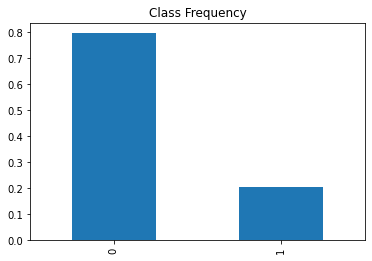

In [17]:
#checking class imbalance
class_freq = df['Exited'].value_counts(normalize = True)
print(class_freq)

class_freq.plot(kind = 'bar')
plt.title('Class Frequency')
plt.show()

We have significantly more 0 instances than 1 instances. We'll have to rebalance the dataset for our model to be adequate.

### Oversampling minority class, adding class weight to model
Let's start by 
 - oversampling the minority class to produce a new training dataset,
 - then, we'll adjust the class weight in the model.

In [18]:
#importing shuffle utility
from sklearn.utils import shuffle

In [19]:
#creating upsampling function
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(
    features_upsampled, target_upsampled, random_state=54321)
    return features_upsampled, target_upsampled

In [20]:
feat_upsampled_train, target_upsampled_train = upsample(feat_train, target_train, 3)
target_upsampled_train.value_counts()

0    5998
1    4506
Name: Exited, dtype: int64

Now the training sample is more balanced. Let's retrain our model, and then assess quality metrics.

In [21]:
%%time
#retraining model, adding class weight
model_forest1 = RandomForestClassifier(random_state = 12345, class_weight = 'balanced')
model_forest1.fit(feat_upsampled_train, target_upsampled_train)

#Make predictions on the test data
pred_forest = model_forest1.predict(feat_valid)

#Calculate accuracy
accuracy = accuracy_score(target_valid, pred_forest)
print("Accuracy:", accuracy)

#Generate classification report
print("Classification Report:")
print(classification_report(target_valid, pred_forest))

#Generate confusion matrix
conf_matrix = confusion_matrix(target_valid, pred_forest)
print("Confusion Matrix:")
print(conf_matrix)
print()
#roc_auc_score
probabilities_valid = model_forest1.predict_proba(feat_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

Accuracy: 0.8524
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1965
           1       0.70      0.55      0.61       535

    accuracy                           0.85      2500
   macro avg       0.79      0.74      0.76      2500
weighted avg       0.84      0.85      0.85      2500

Confusion Matrix:
[[1839  126]
 [ 243  292]]

AUC-ROC: 0.849440441368814
CPU times: user 1.66 s, sys: 11 ms, total: 1.68 s
Wall time: 1.68 s


**Analysis**

The model that was trained on the oversampled dataset and had a 'balanced' class weight had an f1-score of 0.61 for class 1 (customers that exited the bank). This is an *improvement* over the 0.57 f1-score we had in the previous model, before the oversampling.

Accuracy fell minimally, and the AUC-ROC score also fell very little. AUC-ROC score is well above 0.5, which indicates the model is significantly better than chance at distinguishing between the classes (customers that'll exit versus customers that won't).

Below, also a board with AUC-ROC and F1 score ranges and their meanings in terms of model performance. We'll use it to assess our model.

As is, the f1-score currently passes the 0.59 threshold needed. But we can still fine-tune the model and its hyperparameters. Let's do that next.

The AUC-ROC (Area Under the Receiver Operating Characteristic curve) is a metric that measures the performance of a binary classification model in distinguishing between the positive and negative classes. The AUC-ROC value ranges from 0 to 1, where different ranges of values indicate different levels of model performance:

AUC-ROC Value Near 0.5:

- An AUC-ROC value close to 0.5 suggests that the model's ability to discriminate between the positive and negative classes is not much better than random chance. It indicates poor performance.

AUC-ROC Value Between 0.5 and 0.7:

 - An AUC-ROC value between 0.5 and 0.7 indicates that the model has some discriminatory power, but its ability to correctly classify instances is still relatively modest.
 
AUC-ROC Value Between 0.7 and 0.9:

 - An AUC-ROC value between 0.7 and 0.9 suggests that the model has a good ability to discriminate between the classes. It indicates a reasonable level of performance.
 
AUC-ROC Value Above 0.9:

 - An AUC-ROC value above 0.9 indicates that the model has a very strong ability to distinguish between the positive and negative classes. It suggests excellent performance.
 
AUC-ROC Value of 1:

 - An AUC-ROC value of 1 represents a perfect model that perfectly separates the positive and negative classes, without any false positives or false negatives.

The F1-score is a metric that combines both precision and recall to provide a single value that balances the trade-off between correctly identifying positive cases and minimizing incorrect predictions. The F1-score ranges from 0 to 1, and different ranges of values indicate different levels of model performance:

F1-Score Near 0:

- An F1-score close to 0 suggests poor performance, indicating that the model's precision and recall are both very low.

F1-Score Between 0 and 0.5:

 - An F1-score between 0 and 0.5 indicates that the model's balance between precision and recall is compromised, and it's struggling to effectively classify positive cases.
 
F1-Score Between 0.5 and 0.7:

 - An F1-score between 0.5 and 0.7 suggests that the model is achieving a reasonable balance between precision and recall. It indicates moderate performance.
 
F1-Score Between 0.7 and 0.9:

 - An F1-score between 0.7 and 0.9 indicates that the model's precision and recall are both relatively high, showing a good balance between them. It indicates good performance.
 
F1-Score Above 0.9:

 - An F1-score above 0.9 suggests that the model's precision and recall are both very high, indicating excellent performance in classifying positive cases.
 
F1-Score of 1:

 - An F1-score of 1 represents a perfect balance between precision and recall, indicating that the model achieves both perfect precision and perfect recall.

**Summary**

 - Our current model has an AOC-ROC score of 0.84, which indicates a good ability to discriminate between the classes, above chance.
 
 - F1 score of 0.61 suggests it has a reasonable balance between precision and recall, moderate performance.



## Fine-Tuning hyperparameters
We'll mostly focus on fine-tuning 2 hyperparameters of the RandomForestClassifier model:
 - Estimators
 - Max depth

In [22]:
#importing hyperparameter testing library
from sklearn.model_selection import GridSearchCV

In [23]:
%%time

#Defining hyperparameters to test
param_grid = {
    'n_estimators': [100, 110, 130, 150],
    'max_depth': [None, 5, 10, 15, 20]}

#Testing
grid_search = GridSearchCV(estimator=model_forest1, param_grid=param_grid, cv=5)
grid_search.fit(feat_upsampled_train, target_upsampled_train)

CPU times: user 2min 17s, sys: 302 ms, total: 2min 18s
Wall time: 2min 18s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=12345),
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'n_estimators': [100, 110, 130, 150]})

In [24]:
#checking best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(best_params)
print(best_score)

{'max_depth': 20, 'n_estimators': 110}
0.9513521905668503


Excellent. Now we have the set of hyperparameters that yield the best score for the model. Let's train our final model with these hyperparameters, check the F1 score (must be above 0.61) and AUC-ROC score, then finally plot the AUC-ROC score curve, and that's it!

### Testing and final model

In [25]:
%%time
#retraining model, adding class weight
model_final = RandomForestClassifier(random_state = 12345, class_weight = 'balanced', max_depth = 20, n_estimators = 110)
model_final.fit(feat_upsampled_train, target_upsampled_train)

#Make predictions on the test data
pred_forest = model_final.predict(feat_valid)

#Calculate accuracy
accuracy = accuracy_score(target_valid, pred_forest)
print("Accuracy:", accuracy)

#Generate classification report
print("Classification Report:")
print(classification_report(target_valid, pred_forest))

#Generate confusion matrix
conf_matrix = confusion_matrix(target_valid, pred_forest)
print("Confusion Matrix:")
print(conf_matrix)
print()

#roc_auc_score
probabilities_valid = model_final.predict_proba(feat_valid)

probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('AUC-ROC:', auc_roc)

Accuracy: 0.8504
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1965
           1       0.69      0.54      0.61       535

    accuracy                           0.85      2500
   macro avg       0.79      0.74      0.76      2500
weighted avg       0.84      0.85      0.84      2500

Confusion Matrix:
[[1838  127]
 [ 247  288]]

AUC-ROC: 0.8519416898527978
CPU times: user 1.83 s, sys: 3.98 ms, total: 1.83 s
Wall time: 1.84 s


**Summary**

Our final model is ready. The AUC-ROC score and accuraccy improved slighly versus the model that has no fine-tuning, and F1 score is still above 0.59, currently sitting at 0.61.

Let's build our AUC-ROC curve, and deliver the model to Beta Bank for use.

## Final Remarks and AUC-ROC curve

In [26]:
#importing library for roc_curve
from sklearn.metrics import roc_curve

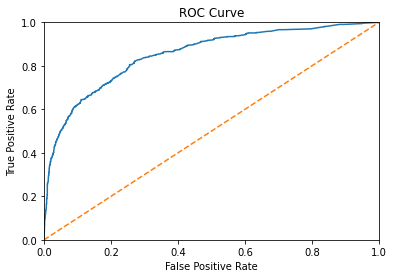

In [27]:
#generating the data for the curve
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

#Plotting random AUC-ROC 
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve')
plt.show()

As we can see in the chart, our model performs well above chance at distinguishing and predicting between customers that will leave the bank vs customers that will stay.

**Closing Remarks**

The final product of the project is completed: the `model_final`. It has an 85% accuracy at predicting if a customer is leaving, with a 69% precision and a recall of 54%, balanced at an F1 score of 0.61, above the 0.59 threshold. Also, an AUC-ROC score of 85%, meaning it is better than chance at making these predictions.

To get here, we had to go through a few steps. Let's recap:

   1. Quick overall look at the data, dealing with missing values and handling columns that were not needed or useful for the models' predictions.
   
   
   2. Data Pre-processing:
    - 1. OHE of categorical columns
    - 2. Split the dataset between target and features
    - 3. Split the dataset between train and validation sets
    
    
   3. Choosing and testing models, checking for dataset class imbalance, fixing it, checking model scores after training it with balanced dataset and class weighted parameters.
   
   
   4. Fine-tuning model with hyperparameters, drawing AUC-ROC curve, creating final model with fine tuned hyperparameters.
   
   
   5. Created final model with best hyperparameters, trained it in the oversampled dataset, tested it in the validation dataset.
   
This concludes the project. Beta Bank can now use the `model_final` to generate predictions for which customers are about to exit the bank.